<a href="https://colab.research.google.com/github/ameerfayiz/ML-notebooks/blob/main/Stable_Diffusion_Fast_UpScaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/huggingface/diffusers.git -q
!pip install transformers accelerate scipy safetensors -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 86.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 113.4 MB/s eta 0:00:00


In [2]:
from diffusers import StableDiffusionLatentUpscalePipeline, StableDiffusionPipeline
import torch


In [3]:
#pipeline = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

pipeline = StableDiffusionPipeline.from_pretrained("wavymulder/Analog-Diffusion", torch_dtype=torch.float16)
pipeline.to("cuda")

safety_checker/model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.13.0.dev0",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [4]:
upscaler = StableDiffusionLatentUpscalePipeline.from_pretrained("stabilityai/sd-x2-latent-upscaler", torch_dtype=torch.float16)
upscaler.to("cuda")

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

StableDiffusionLatentUpscalePipeline {
  "_class_name": "StableDiffusionLatentUpscalePipeline",
  "_diffusers_version": "0.13.0.dev0",
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [65]:
import random
# prompt = "analog style close up photo portrait of a young chinese girl"

# prompt = "analog style Photorealistic portrait of an ghost , slick skin, large eyes, slime, subsurface scattering, alien starship in background, exquisite detail, ethereal light, intricate details, 8K, film grain, bokeh, depth of field, sharp focus, shot on Hasselblad, highly detailed, by greg rutkowski, global illumination, digital art, smog, pollution, toxic waste,3d render, octane render, volumetrics, by greg rutkowski"
# negative_prompt = "child, childish, NSFW, text, signature, watermark, border, blur haze"

prompt = "analog style , cute cat, pretty detailed eyes, intricate, sharp focus, illustration, highly detailed, digital painting, concept art, matte, art by WLOP and Artgerm and Greg Rutkowski and Alphonse Mucha, art by luis royo, masterpiece, oil painting, heavy strokes, paint dripping" 
negative_prompt = "duplicate, copy, multi, poorly drawn, low-res, two faces, two, disfigured, kitsch, ugly, oversaturated, grain, low-res, Deformed, blurry, bad anatomy, disfigured, poorly drawn face, mutation, mutated, extra limb, ugly, poorly drawn hands, missing limb, blurry, floating limbs, disconnected limbs, malformed hands, blur, out of focus, long neck, long body, ugly, disgusting, poorly drawn, childish, mutilated, mangled, old ugly, tiling, poorly drawn hands, poorly drawn feet, poorly drawn face, out of frame, extra limbs, disfigured, deformed, body out of frame, blurry, bad anatomy, blurred, watermark, grainy, signature, cut off, draft, blur haze, blur haze"

prompt = "analog style , Down To The Wire, Portrait, photo realistic, detailed sharp eyes, warm colors, Soft Lighting, realistic, soft skin, soft hairs, by GDNS, 8k, 2d render"
negative_prompt = "3d, ugly, duplicate, morbid, mutilated, out of frame, extra fingers, mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry, bad anatomy, bad proportions, extra limbs, cloned face, disfigured, out of frame, ugly, extra limbs, gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, mutated hands, fused fingers, too many fingers, long neck, signature, words, letters"


generator = torch.manual_seed(random.randint(0,9999999999))
low_res_latents = pipeline(prompt, generator=generator, output_type="latent",width=448,height=640, num_inference_steps = 30, guidance_scale = 7 , negative_prompt=negative_prompt).images
upscaled_image = upscaler(
    prompt=prompt,
    image=low_res_latents,
    num_inference_steps=30,
    guidance_scale=0,
    generator=generator,
).images[0]



  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Low Res Image

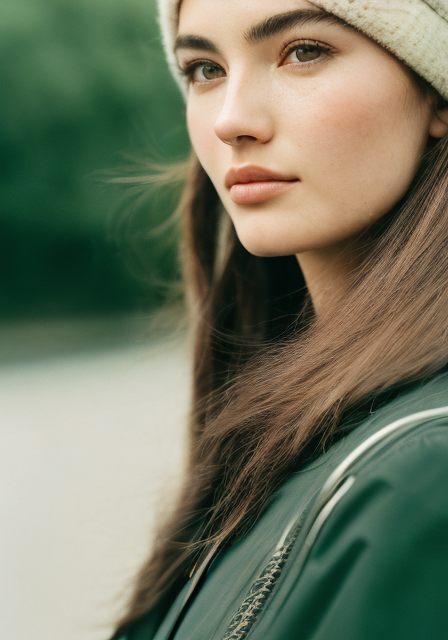

In [66]:
with torch.no_grad():
    image = pipeline.decode_latents(low_res_latents)
image = pipeline.numpy_to_pil(image)[0]

image.save("low_res_image.png")
from IPython.display import Image
Image("low_res_image.png")

HD Image

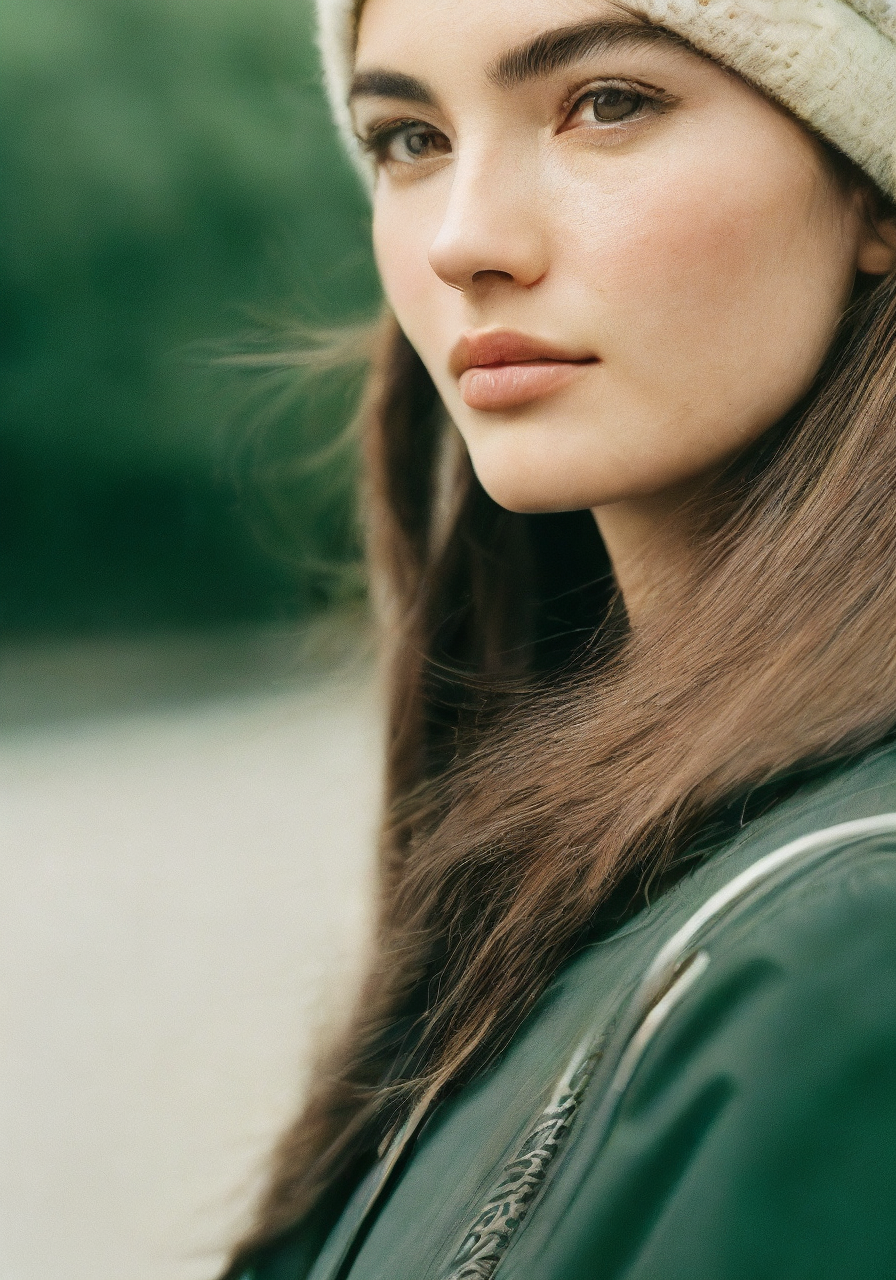

In [67]:
upscaled_image.save("high_res_1024.png")
from IPython.display import Image
Image("high_res_1024.png")